Default RF Accuracy (10 trees): 1.00
Best Accuracy: 1.00 with 1 trees


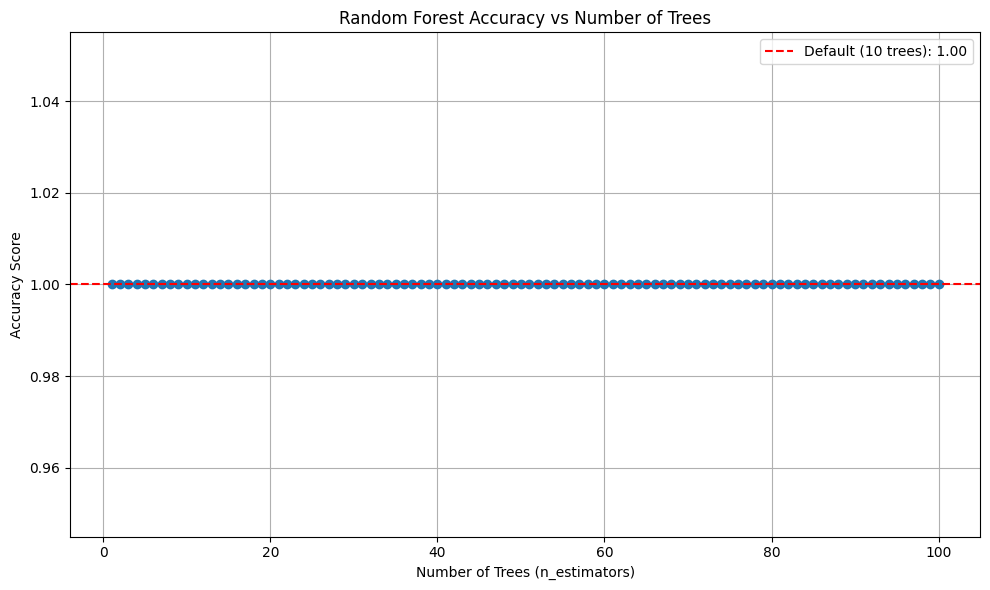

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/iris (4).csv")  # replace with your path if needed

# Prepare features and labels
X = df.drop(columns='species')
y = df['species']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train with default n_estimators = 10
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default RF Accuracy (10 trees): {default_score:.2f}")

# Fine-tuning number of trees
n_estimators_range = range(1, 101)
scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Best score and corresponding number of trees
best_score = max(scores)
best_n = n_estimators_range[scores.index(best_score)]
print(f"Best Accuracy: {best_score:.2f} with {best_n} trees")

# Plotting accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, scores, marker='o')
plt.axhline(y=default_score, color='r', linestyle='--', label=f'Default (10 trees): {default_score:.2f}')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
